In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE,RandomOverSampler 

#will use random forest to compare
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#will use svm rbf to compare as well
from sklearn.pipeline import Pipeline
from sklearn import svm, metrics

In [2]:
#getting data & splitting into training and testing sets
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# _s endings mean that they are datasets that have smote over sampling
smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

ros = RandomOverSampler(random_state=42)
X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
#model_2 -> second version of model & data was fidded with no sampling techniques
# _s the model is fidded data that was oversampled using smote
# _r model is fidded with data that was RandomOverSampler
# _h model is fidded with oversampled data but the layers activation all relu
model_2 = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_smote = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
) 
model_2_rand = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_relu_actv = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="relu")
    ]
) 

# compiling the models
model_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_smote.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_rand.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_relu_actv.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# setting up early stopping, monitering loss 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

In [4]:
#fiting the first NN
hist = model_2.fit(x_train,y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
228/228 [==============================] - 2s 2ms/step - loss: 0.3729 - accuracy: 0.8827 - val_loss: 0.3679 - val_accuracy: 0.8808
Epoch 2/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8827 - val_loss: 0.3661 - val_accuracy: 0.8808
Epoch 3/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8827 - val_loss: 0.3655 - val_accuracy: 0.8808
Epoch 4/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8827 - val_loss: 0.3653 - val_accuracy: 0.8808
Epoch 5/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8827 - val_loss: 0.3647 - val_accuracy: 0.8808
Epoch 6/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8827 - val_loss: 0.3651 - val_accuracy: 0.8808
Epoch 7/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8827 - val_loss: 0.3641 - val_accuracy: 0.8808
Epoch 

[]

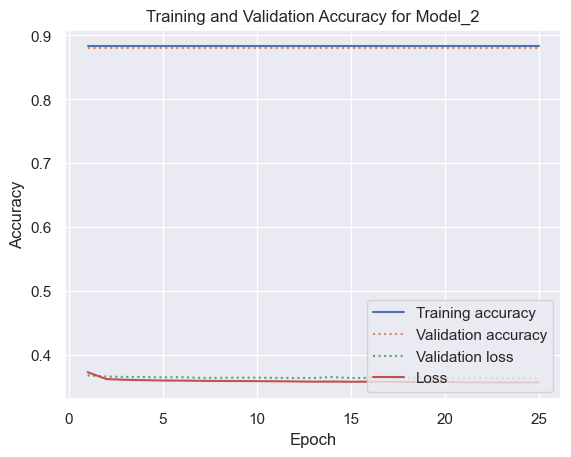

In [5]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for Model_2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

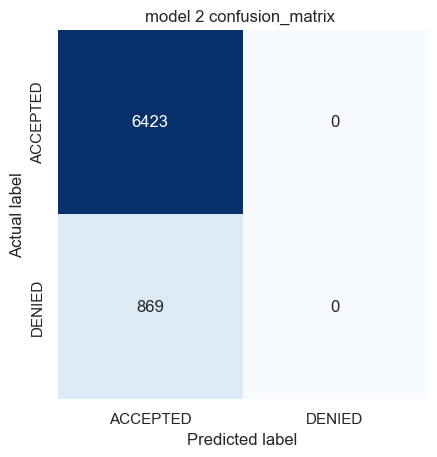

In [6]:
y_predicted = model_2.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 2 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [7]:
# the model is fidded data that was oversampled using smote
hist_s = model_2_smote.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
403/403 [==============================] - 2s 2ms/step - loss: 0.6920 - accuracy: 0.5221 - val_loss: 0.7070 - val_accuracy: 0.3841
Epoch 2/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5399 - val_loss: 0.6886 - val_accuracy: 0.6576
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6858 - accuracy: 0.5515 - val_loss: 0.6901 - val_accuracy: 0.6322
Epoch 4/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.5572 - val_loss: 0.6979 - val_accuracy: 0.5898
Epoch 5/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5610 - val_loss: 0.6797 - val_accuracy: 0.6141
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.5681 - val_loss: 0.6845 - val_accuracy: 0.6064
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6755 - accuracy: 0.5725 - val_loss: 0.7429 - val_accuracy: 0.3567

[]

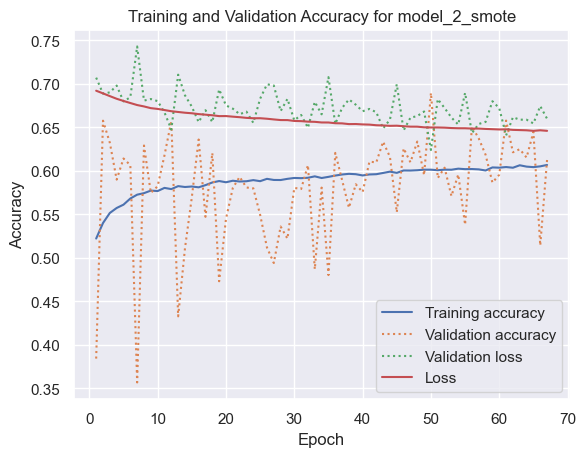

In [8]:
sns.set()
 
acc = hist_s.history['accuracy']
val = hist_s.history['val_accuracy']
loss = hist_s.history['loss']
loss_val = hist_s.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_2_smote')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 921us/step


Text(110.44999999999997, 0.5, 'Actual label')

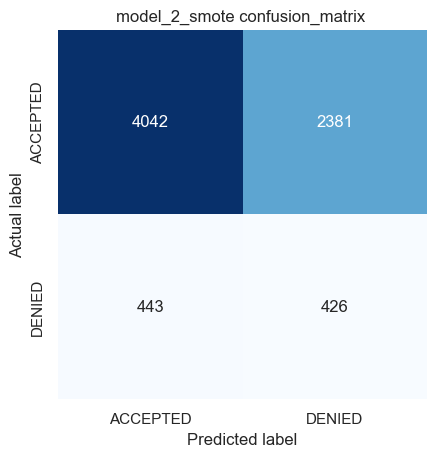

In [9]:
y_predicted = model_2_smote.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_2_smote confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [10]:
# model is fidded with data that was RandomOverSampler
hist_r = model_2_rand.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
403/403 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5330 - val_loss: 0.6979 - val_accuracy: 0.4486
Epoch 2/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5442 - val_loss: 0.6943 - val_accuracy: 0.4390
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.5507 - val_loss: 0.6983 - val_accuracy: 0.4405
Epoch 4/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.5530 - val_loss: 0.6768 - val_accuracy: 0.5739
Epoch 5/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6814 - accuracy: 0.5568 - val_loss: 0.6664 - val_accuracy: 0.5484
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5587 - val_loss: 0.6720 - val_accuracy: 0.5416
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.5601 - val_loss: 0.7111 - val_accuracy: 0.4482

[]

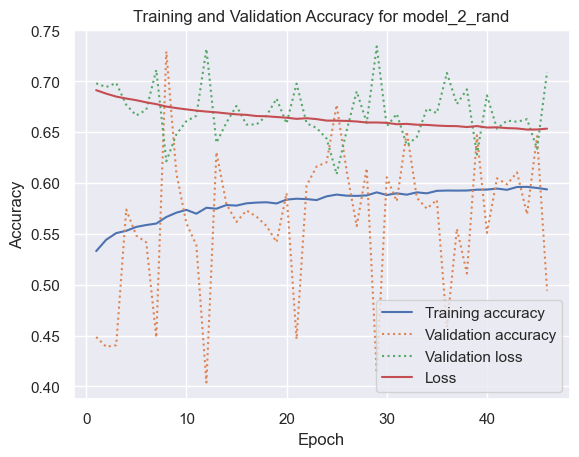

In [11]:
sns.set()
 
acc = hist_r.history['accuracy']
val = hist_r.history['val_accuracy']
loss = hist_r.history['loss']
loss_val = hist_r.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_2_rand')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

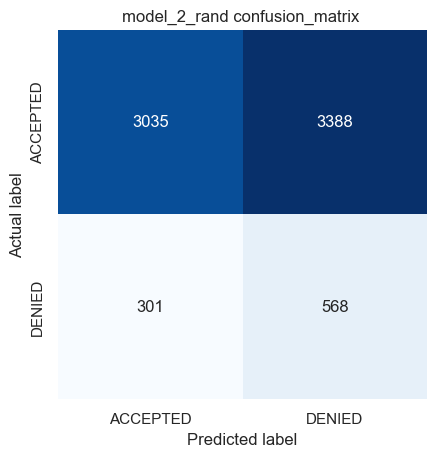

In [12]:
y_predicted = model_2_rand.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_2_rand confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
# model is fidded with oversampled data but the layers activation all relu
hist_h = model_2_relu_actv.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
403/403 [==============================] - 2s 3ms/step - loss: 0.7030 - accuracy: 0.5097 - val_loss: 0.7209 - val_accuracy: 0.3645
Epoch 2/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5361 - val_loss: 0.6794 - val_accuracy: 0.5975
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.5454 - val_loss: 0.6616 - val_accuracy: 0.6105
Epoch 4/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6839 - accuracy: 0.5501 - val_loss: 0.6517 - val_accuracy: 0.6787
Epoch 5/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.5550 - val_loss: 0.6800 - val_accuracy: 0.5787
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.5554 - val_loss: 0.6854 - val_accuracy: 0.5289
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6800 - accuracy: 0.5586 - val_loss: 0.7501 - val_accuracy: 0.3947

In [14]:
# sns.set()
 
# acc = hist_h.history['accuracy']
# val = hist_h.history['val_accuracy']
# loss = hist_h.history['loss']
# loss_val = hist_h.history['val_loss']

# epochs = range(1, len(acc) + 1)
 
# plt.plot(epochs, acc, '-', label='Training accuracy')
# plt.plot(epochs, val, ':', label='Validation accuracy')
# plt.plot(epochs, loss_val, ':', label='Validation loss')
# plt.plot(epochs, loss, '-', label="Loss")
# plt.title('Training and Validation Accuracy for model_2_relu_actv')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.plot()


228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

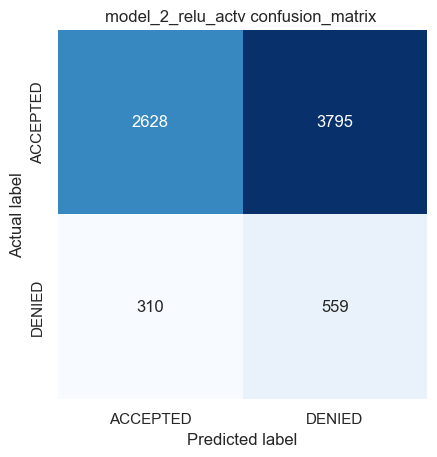

In [15]:
y_predicted = model_2_relu_actv.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_2_relu_actv confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Accuracy Score is 0.88083
      0  1
0  6423  0
1   869  0


Text(110.44999999999997, 0.5, 'Actual label')

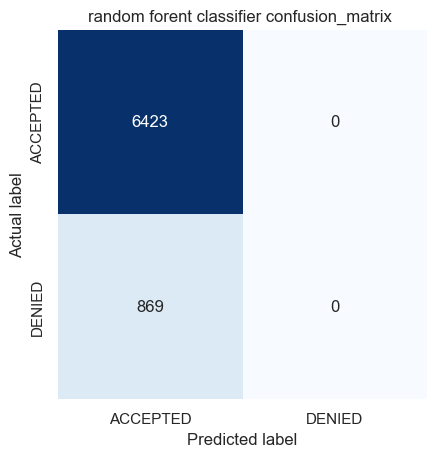

In [16]:
#random forest classifier
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with no oversampling
model_forest.fit(x_train, y_train)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("random forent classifier confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Accuracy Score is 0.77866
      0     1
0  5342  1081
1   533   336


Text(110.44999999999997, 0.5, 'Actual label')

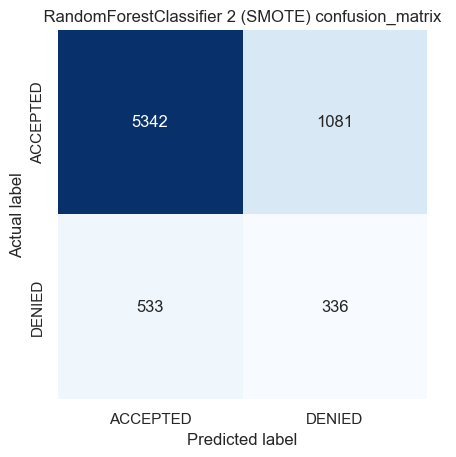

In [17]:
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using smote
model_forest.fit(x_train_s, y_train_s)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title(" RandomForestClassifier 2 (SMOTE) confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')   

Accuracy Score is 0.76138
      0     1
0  5101  1322
1   418   451


Text(110.44999999999997, 0.5, 'Actual label')

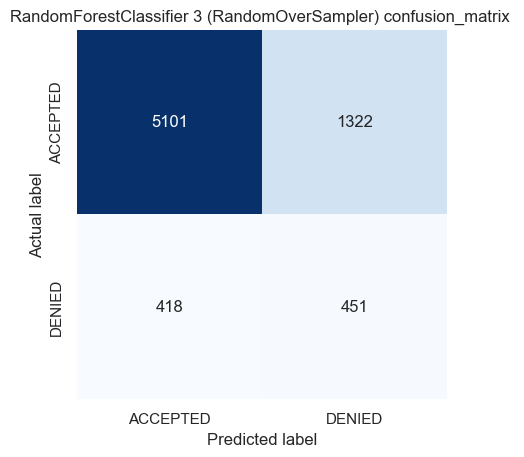

In [18]:
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using RandomOverSampler
model_forest.fit(X_train_r, y_train_r)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("RandomForestClassifier 3 (RandomOverSampler) confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')   

In [19]:
#building the svm RBF and fidding it with data that has been oversampled using smote

rbf_svm_clf = svm.SVC(kernel="rbf", gamma="auto", C=2, decision_function_shape='ovr')

rbf_svm_clf.fit(x_train_s,y_train_s)

SVC(C=2, gamma='auto')

In [23]:
predicted_rbf = rbf_svm_clf.predict(x_test)

#disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_rbf)
#disp.figure_.suptitle("Confusion Matrix for SVM rbf classifier")
print(
    f"Classification report for classifier {predicted_rbf}:\n"
    f"{metrics.classification_report(y_test, predicted_rbf)}\n"
)

Classification report for classifier [0 0 1 ... 0 0 0]:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      6423
           1       0.14      0.47      0.22       869

    accuracy                           0.59      7292
   macro avg       0.52      0.54      0.47      7292
weighted avg       0.80      0.59      0.66      7292


